In [7]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

from matplotlib import rcParams
from matplotlib import pyplot as plt

# Load the data

In [8]:
train_data, info = tfds.load("fashion_mnist", with_info=True, split="train")
test_data = tfds.load("fashion_mnist", split="test")

In [9]:
names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Configure figures showing

In [12]:
rcParams["figure.figsize"] = [10, 10]
rcParams['xtick.labelbottom'] = False

# Showing data

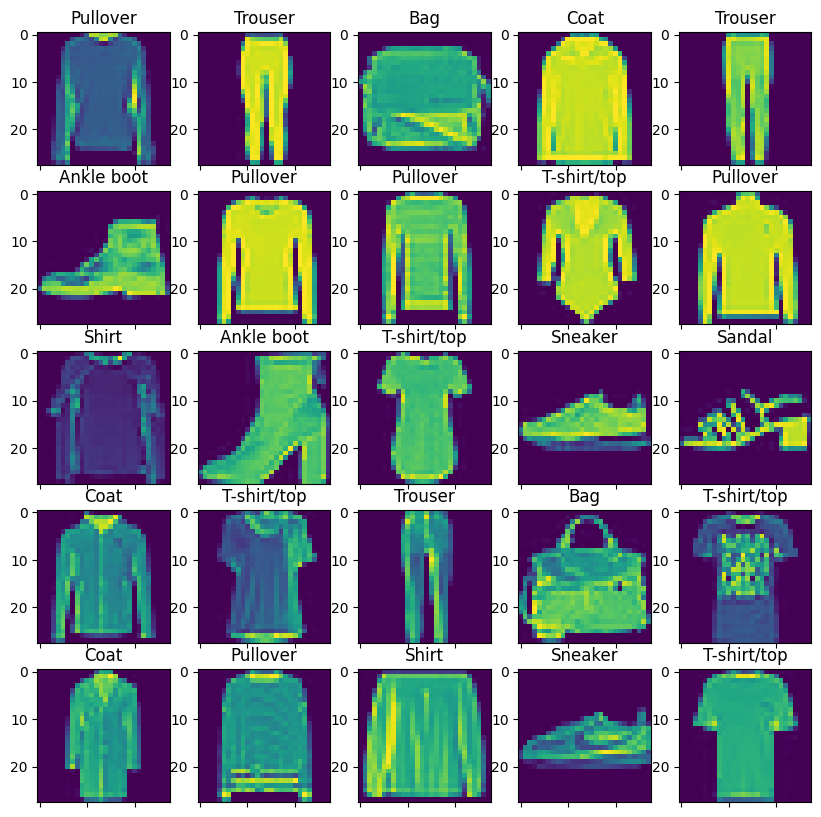

In [11]:
for idx, elem in enumerate(train_data.take(25)):
    plt.subplot(5, 5, idx + 1, title=names[elem['label'].numpy()])
    plt.imshow(elem['image'][:, :, 0])

# Preprocess data

In [13]:
def preprocessing(data):
    x = tf.cast(data["image"], tf.float32)
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y


def preprocessing_with_norm(data):
    x = tf.cast(data["image"], tf.float32) / 255.0
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y

In [22]:
# pre-process the train and the test data
train_data_pre = train_data.map(preprocessing_with_norm)
test_data_pre = test_data.map(preprocessing_with_norm)

batch_size = 64
train_data_pre = train_data_pre.batch(batch_size)
test_data_pre = test_data_pre.batch(batch_size)

# Create model

In [17]:
ann_model = tf.keras.Sequential()
ann_model.add(tf.keras.Input(shape=(28, 28, 1)))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [18]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
ann_model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=["accuracy"])

In [23]:
history = ann_model.fit(train_data_pre, epochs=15)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7226 - loss: 0.7867
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8487 - loss: 0.4145
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8669 - loss: 0.3663
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8760 - loss: 0.3416
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8844 - loss: 0.3218
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8898 - loss: 0.3080
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.2985
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8963 - loss: 0.2899
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9002 - loss: 0.2809
Epoch 10/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9026 - loss: 0.2738
Epoch 11/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9026 - loss: 0.2690
Epoch 12/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

# Draw results

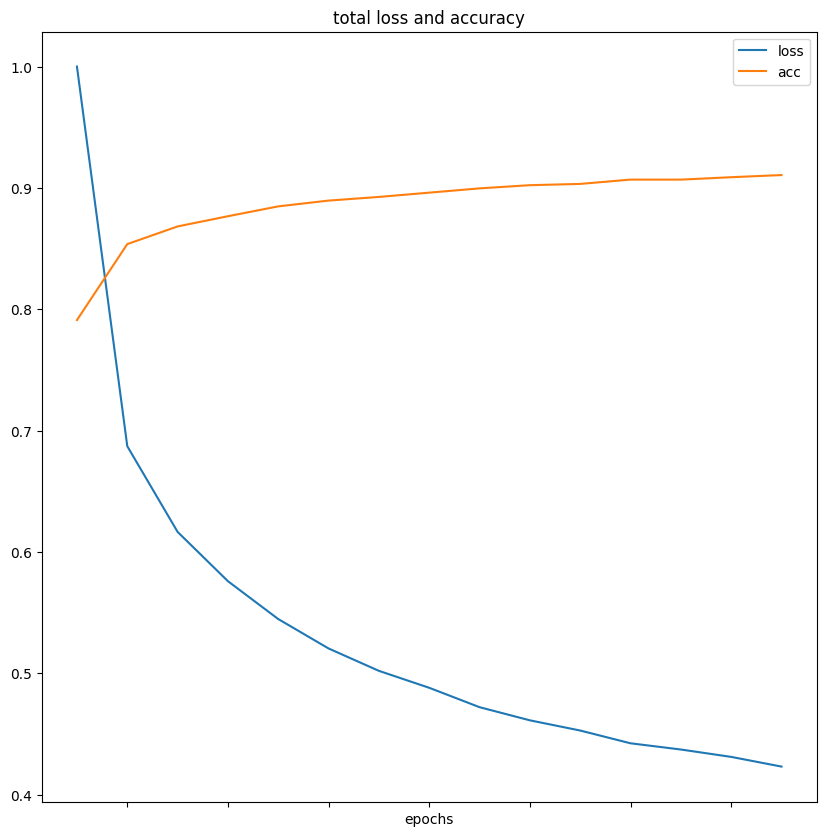

In [24]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
acc_array = history.history['accuracy']

max_loss = max(loss_array)
loss_array = np.array(loss_array) / max_loss

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, acc_array, label="acc")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

# Test unseen data

In [25]:
results = ann_model.evaluate(test_data_pre)
print(results)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.4884
[0.48128658533096313, 0.8734999895095825]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


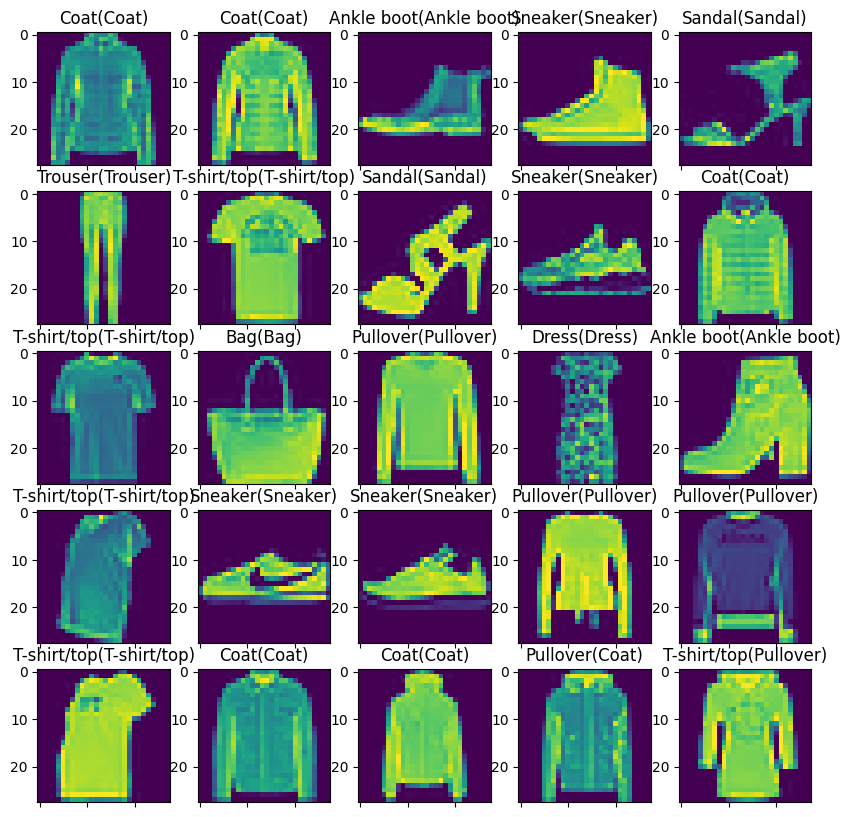

In [27]:
# finally visualize it
x_test = np.concatenate([x for x, y in test_data_pre], axis=0)
y_test = np.concatenate([y for x, y in test_data_pre], axis=0)

test_pred = ann_model.predict(x_test)

for idx, elem in enumerate(test_data.take(25)):
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    plt.subplot(5, 5, idx + 1, title=(names[pred_idx] + "(" + names[true_idx] + ")"))
    plt.imshow(elem['image'][:, :, 0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


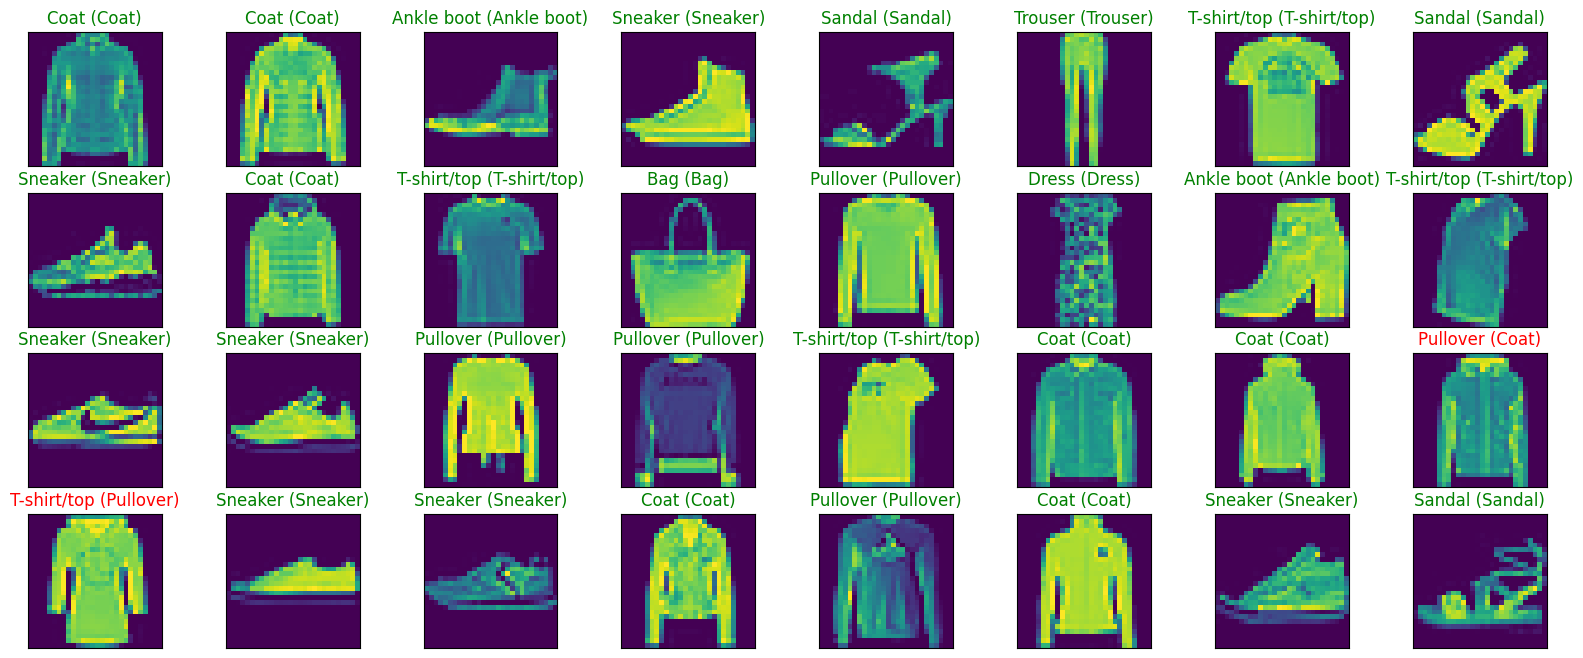

In [28]:
from matplotlib import pyplot

test_pred = ann_model.predict(x_test)
fig = pyplot.figure(figsize=(20, 8))

for idx, elem in enumerate(test_data.take(32)):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(elem['image'][:, :, 0])
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(names[pred_idx], names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
pyplot.show()